# Housing Prices

notebook by Lauren Liao

In [1]:
# imports
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'

## 1. Clean data

In [2]:
# grabbing data
path = 'C:/Users/Lauren/COGS108/HousingPrices.csv'
df = pd.read_csv(path)
print(df.keys())

Index(['Area', 'Category', 'Units', 'Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Avg'],
      dtype='object')


In [3]:
# examining data
print(df.head(5))

    Area                        Category   Units  Year      Jan      Feb  \
0  91901  Average sales price, all homes  Number  2007  439,000  635,000   
1  91901  Average sales price, all homes  Number  2008  430,000  475,000   
2  91901  Average sales price, all homes  Number  2009  405,000  400,000   
3  91901  Average sales price, all homes  Number  2010  375,000  386,000   
4  91901  Average sales price, all homes  Number  2011  373,000  433,000   

       Mar      Apr      May     June     July      Aug      Sep      Oct  \
0  610,000  490,000  615,000  637,500  621,500  607,500  550,000  404,500   
1  516,000  400,000  530,000  492,500  484,000  390,000  405,500  422,000   
2  414,500  418,000  430,000  415,000  497,500  384,000  420,000  375,000   
3  430,000  397,000  450,000  402,500  485,000  417,000  428,000  401,250   
4  390,000  475,000  362,000  416,500  428,000  392,500  309,000  435,000   

       Nov      Dec      Avg  
0  520,000  620,000  562,500  
1  400,000  355,00

In [4]:
# grabbing necessary information
df = df[['Area', 'Year', 'Avg']]
print(df.head(5))

    Area  Year      Avg
0  91901  2007  562,500
1  91901  2008  441,667
2  91901  2009  410,125
3  91901  2010  411,396
4  91901  2011  399,896


In [5]:
# converting data types
df['Area'] = [int(x) for x in df['Area'][:]]
df['Year'] = [int(x) for x in df['Year'][:]]

# replace missing data with 0
df['Avg'].fillna('0', inplace = True)
df['Avg'] = [int(x.replace(",","")) for x in df['Avg'][:]]

In [6]:
# examining the missing data
print(df[df['Avg'] == 0])

      Area  Year  Avg
64   91917  2011    0
286  92060  2011    0
287  92060  2012    0
309  92066  2010    0


In [7]:
print(df[63:66])
# subsitute missing data with average of previous and following year
df['Avg'][64] = (df['Avg'][63] + df['Avg'][65]) / 2
print(df[63:66])

     Area  Year     Avg
63  91917  2010  228333
64  91917  2011       0
65  91917  2012  238083
     Area  Year     Avg
63  91917  2010  228333
64  91917  2011  233208
65  91917  2012  238083


In [8]:
print(df[308:311])
# subsitute missing data with average of previous and following year
df['Avg'][309] = (df['Avg'][308] + df['Avg'][310]) / 2
print(df[308:311])

      Area  Year     Avg
308  92066  2009  117800
309  92066  2010       0
310  92066  2011  121300
      Area  Year     Avg
308  92066  2009  117800
309  92066  2010  119550
310  92066  2011  121300


In [9]:
# deciding to throw out missing data's zipcode
print(df[df['Avg'] == 0])
df = df[df.Area != 92060]
print(df[df['Avg'] == 0])

      Area  Year  Avg
286  92060  2011    0
287  92060  2012    0
Empty DataFrame
Columns: [Area, Year, Avg]
Index: []


## 2. Simple Visualizations

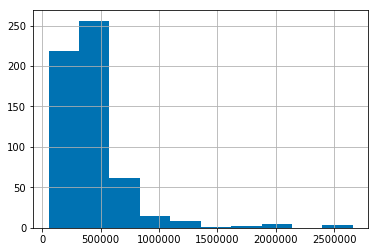

In [10]:
# viewing the housing prices
df['Avg'].hist()

In [11]:
# overall examination
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
outcome, predictors = patsy.dmatrices('Avg ~ Area', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    Avg   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     10.05
Date:                Fri, 26 May 2017   Prob (F-statistic):            0.00160
Time:                        21:30:34   Log-Likelihood:                -8009.0
No. Observations:                 570   AIC:                         1.602e+04
Df Residuals:                     568   BIC:                         1.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -5.04e+07    1.6e+07     -3.144      0.0

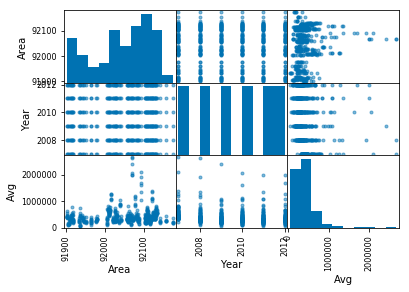

In [12]:
# plotting
fig = pd.scatter_matrix(df)

The plot above needs to be sorted to view changes over time.

## 3. Making more plots as well as refining the data

In [13]:
# grab and sort the zipcodes
zipcodes = df['Area'].value_counts().keys()
zipcodes = zipcodes.sort_values()

In [14]:
# grab and show the years
years = df['Year'].value_counts(ascending = True).keys()
years

Int64Index([2007, 2008, 2009, 2010, 2011, 2012], dtype='int64')

In [15]:
# Year x Zip codes =  average sales price, all homes 
# store values into slices separated by time
bread = np.zeros((len(years),len(zipcodes)))
for i in range(len(years)):
    for codes in zipcodes:
        bread[i][:] = df['Avg'][df['Year'] == years[i]]

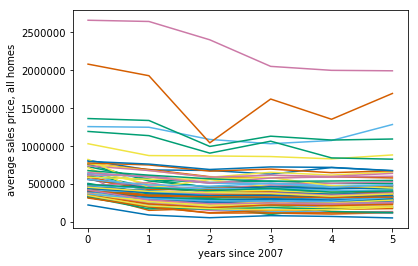

In [16]:
# prices over the years
plt.xlabel('years since 2007')
plt.ylabel('average sales price, all homes')
_ = plt.plot(bread[:][:])

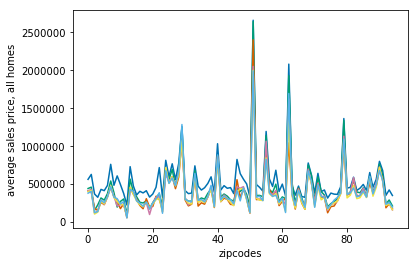

In [17]:
# prices across zipcodes color = each year
plt.xlabel('zipcodes')
plt.ylabel('average sales price, all homes')
_ = plt.plot(bread.T[:][:])

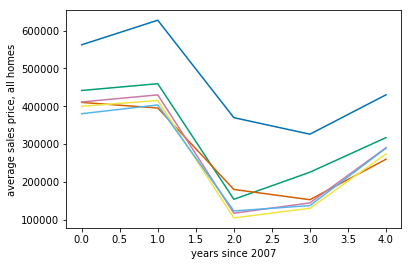

In [18]:
# accessing by each zipcode
plt.xlabel('years since 2007')
plt.ylabel('average sales price, all homes')
# color: each zipcode
_ = plt.plot(bread.T[0:5][:])

## 4. Storing data into h5py

In [19]:
import matplotlib.pyplot as plt
import h5py

#creating data
cogs108h5 = h5py.File('cogs108.h5', 'a')
cogs108h5.create_dataset('hp', data = bread)
cogs108h5.close()

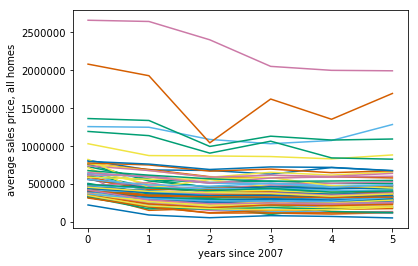

In [20]:
#load data from h5 
h5_file = '../cogs108/cogs108.h5'
#reading data
with h5py.File(h5_file, 'r') as h5:
    dset = h5['hp']
    #_ = plt.plot(dset[:][:])
    plt.xlabel('years since 2007')
    plt.ylabel('average sales price, all homes')
    _ = plt.plot(dset[:][:])